<a href="https://colab.research.google.com/github/aka-gera/Data_Classification/blob/main/water_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFIER**

*This algorithm will identify the optimal classification machine learning model for a given dataset.*

This dataset is provided by: https://www.kaggle.com/datasets/nayanack/water-probability

### Description

We will use classification algorithms to predict whether the water in the dataset is potable or non-potable based on its various chemical and physical characteristics

| Column           | Description                                                                                               |
|------------------|-----------------------------------------------------------------------------------------------------------|
| ph               | The pH value of the water, which indicates its acidity or alkalinity.                                     |
| Hardness         | The level of water hardness, typically measured in milligrams per liter (mg/L) of calcium carbonate.      |
| Solids           | The total dissolved solids (TDS) concentration in the water, usually measured in parts per million (ppm).  |
| Chloramines      | The concentration of chloramines in the water, which are disinfectants commonly used in water treatment.  |
| Sulfate          | The concentration of sulfate ions in the water, often measured in milligrams per liter (mg/L).             |
| Conductivity     | The electrical conductivity of the water, typically measured in microsiemens per centimeter (μS/cm).      |
| Organic_carbon   | The concentration of organic carbon compounds in the water, usually measured in milligrams per liter (mg/L).|
| Trihalomethanes  | The concentration of trihalomethanes in the water, which are disinfection byproducts.                      |
| Turbidity        | The turbidity of the water, which measures its clarity or cloudiness.                                      |
| Potability       | A binary indicator (0 or 1) indicating whether the water is potable (safe for drinking).                  |


In [1]:
data_dir = f'nayanack/water-probability'

# Import Dataset

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd
%cd /content

/content
/content


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download {data_dir}

Dataset URL: https://www.kaggle.com/datasets/nayanack/water-probability
License(s): CC0-1.0
100% 251k/251k [00:00<00:00, 832kB/s]
100% 251k/251k [00:00<00:00, 831kB/s]


In [9]:
import os
file_names = os.listdir()
zip_file =   [file for file in file_names if file.endswith('.zip')]
zip_file

['water-probability.zip']

In [10]:
import zipfile

# Open the zip file
with zipfile.ZipFile(zip_file[-1], 'r') as zip_ref:
    zip_ref.extractall()
    unzipped_file_names = zip_ref.namelist()
unzipped_file_names

['water_potability.csv']

# Import the helper classes

In [11]:
!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis

/content
/content/drive/MyDrive/ML2023/data-analysis


In [12]:
!pip install AutoLogging-ML
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [13]:
from plotly.subplots import make_subplots
from AutoLogging_ML import AutoLogger
import seaborn as sns

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [14]:
from aka_data_analysis.aka_nn import aka_nn

In [15]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information

In [45]:
df = aka_clean.df_get(f'/content/{unzipped_file_names[0]}')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [46]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [47]:
fig = aka_plot.Plot_histogram_Features(df,[0,1,2,-2,-1] )
if fig is not None:
    fig.show()

In [48]:
aka_plot.plot_pie(df,-1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [51]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Clean Dataset

## Drop Duplicate data

In [52]:
df.drop_duplicates()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Swap the target and the last feature

In [53]:
df = aka_clean.swap_features(df,-1)
df.head()

Invalid feature indices or feat_a is equal to feat_b.


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Drop feature(s)


In [54]:
feat =  []
df = aka_clean.drop_feature(df,feat)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


##  Convert categorical variables into numerical representations

In [50]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [55]:
data_nan = 'drop'  # Choose 'mode' to fill NaN values with the mode of the feature
                   # Choose 'mean' to fill NaN values with the mean of the feature
                   # Choose 'drop' to drop rows containing NaN values

mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping,data_nan)

## Balance Dataset

In [56]:
aka_plot.plot_pie(df,-1)

In [57]:
# df = aka_clean.balance_df(df,'j')
# aka_plot.plot_pie(df, -1)

## Correlation Matrix

In [58]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [59]:

confidence_interval_limit =   [-3,3]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

correlation_percentage_threshold = .7      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

print(f'We dropped {df.shape[0]-df_filtered.shape[0]} outliers and remove {df.shape[1]-df_filtered.shape[1]} feature(s)')
print(f'The filtered dataset\'s shape is {df_filtered.shape} ')

We dropped 82 outliers and remove 0 feature(s)
The filtered dataset's shape is (1929, 10) 


## Graph the features that are highly correlated


In [60]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp))
if fig is not None:
    fig.show()

Empty list is provided.


### Visualize the distribution of the filtered dataset

In [61]:
aka_plot.Plot_box_Features(df,df_filtered,corr_tmp=range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [62]:
pre_proc = 'X'                                # Choose between 'XY' to standardize both 'X' and 'Y',
                                              #                'X' to standardize only 'X',
                                              #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

In [63]:
r,model =AutoLogger.train_and_log_classification(X_train,y_train,X_test,y_test,size='large')
y_pred = model.predict(X_test)

In [64]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: xlabel='validation-accuracy', ylabel='model'>

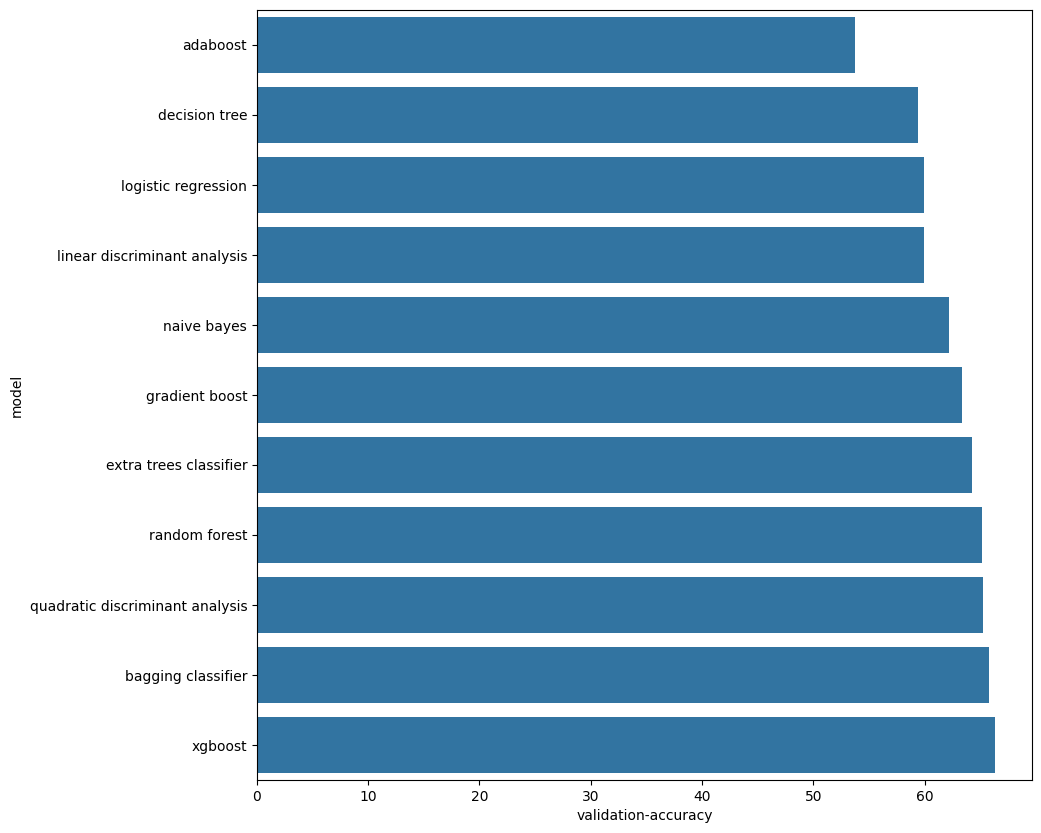

In [65]:
AutoLogger.get_metric_plot_classification(r,'validation','accuracy')

## Confusion Matrix

In [66]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
Label = ['v_'+str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [67]:
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label)
fig2.show()

## Classification Report

In [68]:
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label)
fig3.show()

## Plot Important Features by Weight

In [69]:
# aka_plot.plot_important_features(model,df_filtered)

# Neural Net

## Neural Network Parameters

In [70]:
activation = 'relu'
epoch = 10
num_nodes = [2,4]
dropout_prob = [0.05,0.1]
lr = [0.01,0.1]
batch_size = [2,4]

In [71]:

myNN = aka_nn(X_train, X_test, y_train, y_test,activation)
model,scre =myNN.DNN(epoch,num_nodes,dropout_prob,lr,batch_size)
y_pred = myNN.predict(model)

2 nodes, dropout 0.05, lr 0.01, batch size 2
19/19 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.6045
2 nodes, dropout 0.05, lr 0.01, batch size 4
19/19 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.6010
2 nodes, dropout 0.05, lr 0.1, batch size 2
19/19 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.6010
2 nodes, dropout 0.05, lr 0.1, batch size 4
19/19 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.6010
2 nodes, dropout 0.1, lr 0.01, batch size 2
19/19 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.6149
2 nodes, dropout 0.1, lr 0.01, batch size 4
19/19 [==============================] - 0s 4ms/step - loss: 0.2398 - accuracy: 0.6010
2 nodes, dropout 0.1, lr 0.1, batch size 2
19/19 [==============================] - 0s 5ms/step - loss: 0.2672 - accuracy: 0.3990
2 nodes, dropout 0.1, lr 0.1, batch size 4
19/19 [==============================] 

## Confusion Matrix

In [72]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
# Label = [str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [73]:
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label)
fig2.show()

## Classification Report

In [74]:
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label)
fig3.show()